<a href="https://colab.research.google.com/github/ss6481/Cognifyz_Level_2/blob/main/Level%203%20task%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Restaurant ID                           Restaurant Name  Country Code  \
0        6317637                          Le Petit Souffle           162   
1        6304287                          Izakaya Kikufuji           162   
2        6300002                    Heat - Edsa Shangri-La           162   
3        6318506                                      Ooma           162   
4        6314302                               Sambo Kojin           162   
5       18189371                              Din Tai Fung           162   
6        6300781                                Buffet 101           162   
7        6301290                                   Vikings           162   
8        6300010  Spiral - Sofitel Philippine Plaza Manila           162   
9        6314987                                  Locavore           162   

               City                                            Address  \
0       Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1       Makati 

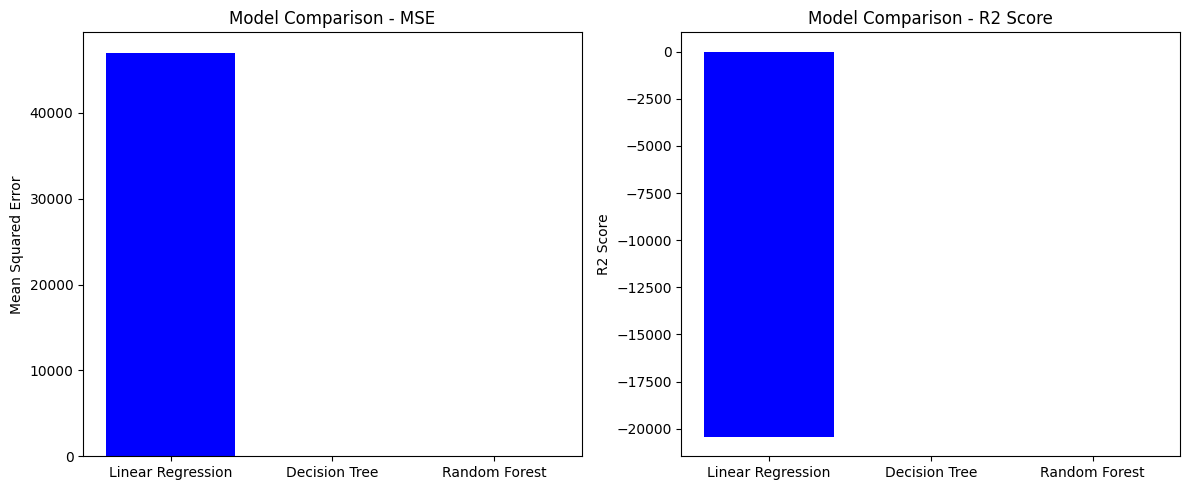

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Dataset.csv')

# Display the first few rows of the dataset
print(data.head(10))

# Preprocess the data
# Assuming that the target variable is 'aggregate_rating' and other columns are features
X = data.drop('Aggregate rating', axis=1)
y = data['Aggregate rating']

# Identify columns with string (object) dtype
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Handle categorical features (example using one-hot encoding)
X = pd.get_dummies(X, columns=categorical_cols) # Convert string columns to numerical using one-hot encoding

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

# Initialize the models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

# Train the models
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_reg.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Evaluate the models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Linear Regression - MSE: {:.2f}, R2: {:.2f}".format(mse_lr, r2_lr))
print("Decision Tree - MSE: {:.2f}, R2: {:.2f}".format(mse_dt, r2_dt))
print("Random Forest - MSE: {:.2f}, R2: {:.2f}".format(mse_rf, r2_rf))

# Plot the results
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse_lr, mse_dt, mse_rf]
r2_values = [r2_lr, r2_dt, r2_rf]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison - MSE')

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.ylabel('R2 Score')
plt.title('Model Comparison - R2 Score')

plt.tight_layout()
plt.show()